In [2]:
import pandas as pd
import os
import librosa
import numpy as np

In [3]:
data_dir = "./datasets/ff1010/ff1010bird_metadata_2018.csv"

csv = pd.read_csv(data_dir)

In [4]:
csv

,itemid,datasetid,hasbird
0,64486,ff1010bird,0
1,2525,ff1010bird,0
2,44981,ff1010bird,0
3,101323,ff1010bird,0
4,165746,ff1010bird,0
...,...,...,...
7685,168059,ff1010bird,0
7686,164922,ff1010bird,0
7687,80789,ff1010bird,1
7688,104733,ff1010bird,1


In [5]:
filepath = "/datasets/ff1010/wav"
csv["wav_path"] = csv["itemid"].apply(lambda id: os.path.join(filepath, f"{id}.wav"))

In [6]:
csv

,itemid,datasetid,hasbird,wav_path
0,64486,ff1010bird,0,/datasets/ff1010/wav\64486.wav
1,2525,ff1010bird,0,/datasets/ff1010/wav\2525.wav
2,44981,ff1010bird,0,/datasets/ff1010/wav\44981.wav
3,101323,ff1010bird,0,/datasets/ff1010/wav\101323.wav
4,165746,ff1010bird,0,/datasets/ff1010/wav\165746.wav
...,...,...,...,...
7685,168059,ff1010bird,0,/datasets/ff1010/wav\168059.wav
7686,164922,ff1010bird,0,/datasets/ff1010/wav\164922.wav
7687,80789,ff1010bird,1,/datasets/ff1010/wav\80789.wav
7688,104733,ff1010bird,1,/datasets/ff1010/wav\104733.wav


(441000,)
(96, 1576)


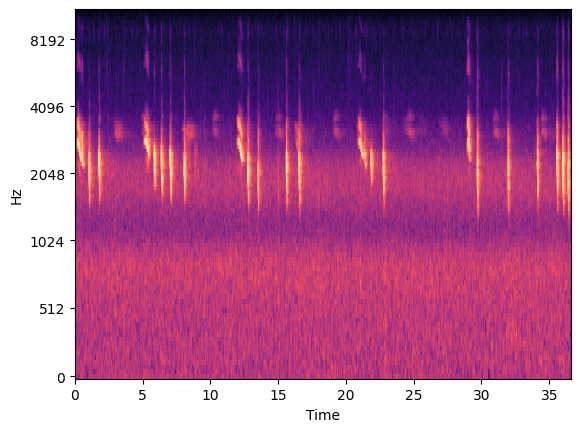

In [9]:
import tensorflow as tf
# file = "C:\\Users\\westl\\OneDrive\Desktop\\esp32_s333_bird\\datasets\\ff1010\\wav\\3179.wav"
file = "C:\\Users\\westl\\OneDrive\Desktop\\esp32_s333_bird\\datasets\\ff1010\\wav\\37798.wav"

audio_data, sample_rate = librosa.load(file, sr=None)

print(audio_data.shape)

spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, power=2, fmin=1024, n_fft=2048, hop_length=280, n_mels=96)

# spectrogram = image.resize(np.expand_dims(spectrogram, axis=-1), (128,128))
print(spectrogram.shape)

librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), x_axis='time', y_axis='mel')
# linear, log, symlog, asinh, logit, function, functionlog

In [18]:
def select_pixels(spectrogram):
    row_median = np.median(spectrogram, axis=0)
    col_median = np.median(spectrogram, axis=1)


    for i, row in enumerate(spectrogram, start=0):
        for i2, item in enumerate(row, start=0):

            if not (item >= row_median[i] and item >= col_median[i2]):
                spectrogram[i][i2] = 0

    return spectrogram

spectrogram = select_pixels(spectrogram)

librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), x_axis='time', y_axis='mel')

IndexError: index 96 is out of bounds for axis 0 with size 96